In [ ]:
  from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Geral

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/trab final ML/all_features.csv')
df.head(3)

,Unnamed: 0,city,"Nos últimos 3 meses o(a) Sr(a) teve a preocupação de que a comida na sua casa acabasse antes que tivesse condição de comprar, receber ou produzir mais comida?",Nos últimos 3 meses a comida acabou antes que o(a) Sr(a) tivesse dinheiro para comprar mais?,"Nos últimos 3 meses, o(a) Sr(a) alguma vez comeu menos do que achou que devia porque não havia dinheiro suficiente para comprar comida?","Nos últimos 3 meses, o(a) Sr(a) ficou sem dinheiro para ter uma alimentação saudável e variada?","Nos últimos 3 meses, o(a) Sr(a) ou algum adulto em sua casa diminuiu, alguma vez, a quantidade de alimentos nas refeições, ou pulou refeições, porque não havia dinheiro suficiente para comprar a comida?",Você acha que após a COVID houve uma mudança na disponibilidade de alimentos para a sua família?,Você cria animais que são utilizados para consumo da sua família?,Você planta alimentos que são utilizados para consumo da sua família?,...,"No domicílio, existe banheiro ou sanitário?",O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?,Qual a forma de iluminação utilizada no domicílio? (marque o mais utilizado),"Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?","Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?","Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?",O domicílio está localizado em área de conflito/violência?,ia level,Y,city_enc
0,0,milagres,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,moderada,2,108
1,1,porteiras,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,moderada,2,139
2,2,ipueiras,0,1,1,0,1,0,1,1,...,1,0,1,0,0,0,1,grave,0,79


In [ ]:
df.shape

(33595, 33)

In [ ]:
df.isna().sum()

Unnamed: 0                                                                                                                                                                                                    0
city                                                                                                                                                                                                          0
Nos últimos 3 meses o(a) Sr(a) teve a preocupação de que a comida na sua casa acabasse antes que tivesse condição de comprar, receber ou produzir mais comida?                                                0
Nos últimos 3 meses a comida acabou antes que o(a) Sr(a) tivesse dinheiro para comprar mais?                                                                                                                  0
Nos últimos 3 meses, o(a) Sr(a) alguma vez comeu menos do que achou que devia porque não havia dinheiro suficiente para comprar comida?                                 

In [ ]:
df.describe()

,Unnamed: 0,"Nos últimos 3 meses o(a) Sr(a) teve a preocupação de que a comida na sua casa acabasse antes que tivesse condição de comprar, receber ou produzir mais comida?",Nos últimos 3 meses a comida acabou antes que o(a) Sr(a) tivesse dinheiro para comprar mais?,"Nos últimos 3 meses, o(a) Sr(a) alguma vez comeu menos do que achou que devia porque não havia dinheiro suficiente para comprar comida?","Nos últimos 3 meses, o(a) Sr(a) ficou sem dinheiro para ter uma alimentação saudável e variada?","Nos últimos 3 meses, o(a) Sr(a) ou algum adulto em sua casa diminuiu, alguma vez, a quantidade de alimentos nas refeições, ou pulou refeições, porque não havia dinheiro suficiente para comprar a comida?",Você acha que após a COVID houve uma mudança na disponibilidade de alimentos para a sua família?,Você cria animais que são utilizados para consumo da sua família?,Você planta alimentos que são utilizados para consumo da sua família?,A senhora ou sua família recebem algum benefício do governo do Estado do Ceará (poderá marcar mais de uma resposta)_x,...,A água utilizada para beber neste domicílio é:,"No domicílio, existe banheiro ou sanitário?",O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?,Qual a forma de iluminação utilizada no domicílio? (marque o mais utilizado),"Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?","Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?","Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?",O domicílio está localizado em área de conflito/violência?,Y,city_enc
count,33595.000000,33595.000000,33595.000000,33595.000000,33595.000000,33595.000000,33595.000000,33595.000000,33595.000000,33595.000000,...,33595.000000,33595.000000,33595.000000,33595.000000,33595.000000,33595.000000,33595.000000,33595.000000,33595.000000,33595.000000
mean,17297.961542,0.250781,0.371365,0.386456,0.249769,0.464563,0.092692,0.340854,0.400863,0.276761,...,0.699181,0.856229,0.661527,0.984849,0.223813,0.033576,0.209704,0.886561,1.362643,98.183033
std,10007.592845,0.433469,0.483177,0.486944,0.432886,0.498750,0.290005,0.474004,0.490081,0.166259,...,0.458621,0.350863,0.473197,0.122155,0.416804,0.180139,0.407103,0.317134,1.023783,50.390223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8632.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,56.000000
50%,17278.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,105.000000
75%,25954.500000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.400000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,139.000000
max,34615.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,177.000000


In [ ]:
df[['ia level', 'Y']].value_counts()

ia level  Y
moderada  2    17707
grave     0    10990
sem ia    3     2733
leve      1     2165
dtype: int64

In [ ]:
# Dataset desbalanceado

In [ ]:
df.columns

Index(['Unnamed: 0', 'city',
       'Nos últimos 3 meses o(a) Sr(a) teve a preocupação de que a comida na sua casa acabasse antes que tivesse condição de comprar, receber ou produzir mais comida?',
       'Nos últimos 3 meses a comida acabou antes que o(a) Sr(a) tivesse dinheiro para comprar mais?',
       'Nos últimos 3 meses, o(a) Sr(a) alguma vez comeu menos do que achou que devia porque não havia dinheiro suficiente para comprar comida?',
       'Nos últimos 3 meses, o(a) Sr(a) ficou sem dinheiro para ter uma alimentação saudável e variada?',
       'Nos últimos 3 meses, o(a) Sr(a) ou algum adulto em sua casa diminuiu, alguma vez, a quantidade de alimentos nas refeições, ou pulou refeições, porque não havia dinheiro suficiente para comprar a comida?',
       'Você acha que após a COVID houve uma mudança na disponibilidade de alimentos para a sua família?',
       'Você cria animais que são utilizados para consumo da sua família?',
       'Você planta alimentos que são utilizados pa

In [ ]:
df['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)'].value_counts()

0.412541    9945
0.330033    2118
0.495050    1779
0.288779    1184
0.577558     957
            ... 
0.501650       1
0.001219       1
0.220297       1
0.512376       1
0.151815       1
Name: Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância), Length: 866, dtype: int64

In [ ]:
excluir = ['city_enc',
           'city',
           "Unnamed: 0",
           "Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)",
           'Nos últimos 3 meses o(a) Sr(a) teve a preocupação de que a comida na sua casa acabasse antes que tivesse condição de comprar, receber ou produzir mais comida?',
           'Nos últimos 3 meses a comida acabou antes que o(a) Sr(a) tivesse dinheiro para comprar mais?',
           'Nos últimos 3 meses, o(a) Sr(a) alguma vez comeu menos do que achou que devia porque não havia dinheiro suficiente para comprar comida?',
           'Nos últimos 3 meses, o(a) Sr(a) ficou sem dinheiro para ter uma alimentação saudável e variada?',
           'Nos últimos 3 meses, o(a) Sr(a) ou algum adulto em sua casa diminuiu, alguma vez, a quantidade de alimentos nas refeições, ou pulou refeições, porque não havia dinheiro suficiente para comprar a comida?',
           'A senhora ou sua família recebem algum benefício do governo do Estado do Ceará (poderá marcar mais de uma resposta)_x']

In [ ]:
df.drop(excluir, axis=1, inplace=True)

In [ ]:
df.columns

Index(['Você acha que após a COVID houve uma mudança na disponibilidade de alimentos para a sua família?',
       'Você cria animais que são utilizados para consumo da sua família?',
       'Você planta alimentos que são utilizados para consumo da sua família?',
       'Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Nos últimos 12 meses, alguém no seu domicílio fez algum curso de qualificação?',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca

In [ ]:
df['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?'].value_counts()

0    27905
1     5690
Name: Atualmente, alguém no seu domicílio tem algum trabalho remunerado?, dtype: int64

In [ ]:
df.drop('Se sim, quantos trabalham?', axis=1, inplace=True)

In [ ]:
df.columns

Index(['Você acha que após a COVID houve uma mudança na disponibilidade de alimentos para a sua família?',
       'Você cria animais que são utilizados para consumo da sua família?',
       'Você planta alimentos que são utilizados para consumo da sua família?',
       'Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Nos últimos 12 meses, alguém no seu domicílio fez algum curso de qualificação?',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?

In [ ]:
df.head()

,Você acha que após a COVID houve uma mudança na disponibilidade de alimentos para a sua família?,Você cria animais que são utilizados para consumo da sua família?,Você planta alimentos que são utilizados para consumo da sua família?,"Atualmente, alguém no seu domicílio tem algum trabalho remunerado?","Nos últimos 12 meses, alguém no seu domicílio fez algum curso de qualificação?",Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?,cras,creas,A casa onde a família mora é:,Qual é o material predominante na construção das paredes externas no domicílio?,...,A água utilizada para beber neste domicílio é:,"No domicílio, existe banheiro ou sanitário?",O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?,Qual a forma de iluminação utilizada no domicílio? (marque o mais utilizado),"Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?","Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?","Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?",O domicílio está localizado em área de conflito/violência?,ia level,Y
0,0,0,0,0,0,0,0,0,1,1,...,0,1,1,1,0,0,0,1,moderada,2
1,0,0,0,0,0,1,1,0,1,0,...,1,1,0,1,0,0,0,1,moderada,2
2,0,1,1,0,0,1,0,0,1,0,...,1,1,0,1,0,0,0,1,grave,0
3,1,1,1,0,1,1,1,0,1,0,...,1,1,0,1,0,0,0,1,grave,0
4,0,0,1,0,0,1,0,0,1,0,...,1,1,1,1,0,0,0,1,moderada,2


In [ ]:
df.shape

(33595, 22)

### Balanceamento multiclasse under

In [ ]:
df_x_under = df.copy()
df_x_under.drop(['ia level', 'Y'], axis=1, inplace=True)

df_y_under = df['Y']

In [ ]:
rus = RandomUnderSampler(random_state=42)

features_balanceadas, target_balanceado = rus.fit_resample(df_x_under, df_y_under)

In [ ]:
target_balanceado.value_counts()

0    2165
1    2165
2    2165
3    2165
Name: Y, dtype: int64

In [ ]:
dados_balanceados = pd.DataFrame(features_balanceadas, columns=df_x_under.columns)

dados_balanceados['target'] = target_balanceado

In [ ]:
dados_balanceados.columns

Index(['Você acha que após a COVID houve uma mudança na disponibilidade de alimentos para a sua família?',
       'Você cria animais que são utilizados para consumo da sua família?',
       'Você planta alimentos que são utilizados para consumo da sua família?',
       'Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Nos últimos 12 meses, alguém no seu domicílio fez algum curso de qualificação?',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?

In [ ]:
dados_balanceados['target'].value_counts()

0    2165
1    2165
2    2165
3    2165
Name: target, dtype: int64

In [ ]:
dados_balanceados.shape

(8660, 21)

In [ ]:
dados_balanceados.to_csv('/content/drive/MyDrive/trab final ML/dados/multiclasse-under.csv', index=False)

### Balanceamento multiclasse over

In [ ]:
df_x_over = df.copy()
df_x_over.drop(['ia level', 'Y'], axis=1, inplace=True)

df_y_over = df['Y']

In [ ]:
smt = SMOTETomek(random_state=42, sampling_strategy='not majority')

X_res, y_res = smt.fit_resample(df_x_over, df_y_over)

In [ ]:
y_res.value_counts()

1    17696
3    17693
0    17656
2    17651
Name: Y, dtype: int64

In [ ]:
dados_balanceados2 = pd.DataFrame(X_res, columns=df_x_over.columns)

dados_balanceados2['target'] = y_res

In [ ]:
dados_balanceados2['target'].value_counts()

1    17696
3    17693
0    17656
2    17651
Name: target, dtype: int64

In [ ]:
dados_balanceados2.shape

(70696, 21)

In [ ]:
dados_balanceados2.to_csv('/content/drive/MyDrive/trab final ML/dados/multiclasse-over.csv', index=False)

### Tranformando em binário

In [ ]:
df[['ia level', 'Y']].value_counts()

ia level  Y
moderada  2    17707
grave     0    10990
sem ia    3     2733
leve      1     2165
dtype: int64

In [ ]:
df.shape

(33595, 22)

In [ ]:
df['target_binario'] = (df['Y'].isin([2, 0, 1])).astype(int)

In [ ]:
df['target_binario'].value_counts()

1    30862
0     2733
Name: target_binario, dtype: int64

In [ ]:
df.shape

(33595, 23)

In [ ]:
df.columns

Index(['Você acha que após a COVID houve uma mudança na disponibilidade de alimentos para a sua família?',
       'Você cria animais que são utilizados para consumo da sua família?',
       'Você planta alimentos que são utilizados para consumo da sua família?',
       'Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Nos últimos 12 meses, alguém no seu domicílio fez algum curso de qualificação?',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?

### Balanceamento binário under

In [ ]:
df_x_bi_under = df.copy()
df_x_bi_under.drop(['ia level', 'Y', 'target_binario'], axis=1, inplace=True)

df_y_bi_under = df['target_binario']

In [ ]:
rus = RandomUnderSampler(random_state=42)

features_balanceadas, target_balanceado = rus.fit_resample(df_x_bi_under, df_y_bi_under)

In [ ]:
dados_balanceados3 = pd.DataFrame(features_balanceadas, columns=df_x_bi_under.columns)

dados_balanceados3['target_binario'] = target_balanceado

In [ ]:
dados_balanceados3.shape

(5466, 21)

In [ ]:
dados_balanceados3['target_binario'].value_counts()

0    2733
1    2733
Name: target_binario, dtype: int64

In [ ]:
dados_balanceados3.to_csv('/content/drive/MyDrive/trab final ML/dados/binario-under.csv', index=False)

### Balanceamento binário over

In [ ]:
df_x_bi_over = df.copy()
df_x_bi_over.drop(['ia level', 'Y', 'target_binario'], axis=1, inplace=True)

df_y_bi_over = df['target_binario']

In [ ]:
smt = SMOTETomek(random_state=42, sampling_strategy='not majority')

X_res, y_res = smt.fit_resample(df_x_bi_over, df_y_bi_over)

In [ ]:
y_res.value_counts()

1    30847
0    30847
Name: target_binario, dtype: int64

In [ ]:
dados_balanceados4 = pd.DataFrame(X_res, columns=df_x_bi_over.columns)

dados_balanceados4['target_binario'] = y_res

In [ ]:
dados_balanceados4['target_binario'].value_counts()

1    30847
0    30847
Name: target_binario, dtype: int64

In [ ]:
dados_balanceados4.shape

(61694, 21)

In [ ]:
dados_balanceados4.to_csv('/content/drive/MyDrive/trab final ML/dados/binario-over.csv', index=False)

# AutoML

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697886 sha256=47e61d7cb19e31e5bf760f0f0ac131301f4b61e0fd7afb5fb6c3a6bbcf783ad5
  Stored in directory: /root/.cache/pip/wheels/43/f2/b0/5bb4d702a0467e82d77c45088db3eef25114c26b0eec8e7f6a
Successfully built h2o


In [ ]:
import h2o

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpu7slt_3r
  JVM stdout: /tmp/tmpu7slt_3r/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpu7slt_3r/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,2 months
H2O_cluster_name:,H2O_from_python_unknownUser_cm7f85
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
bin_over  = h2o.import_file("/content/drive/MyDrive/dados_automl_ama/binario-over.csv")
bin_under = h2o.import_file("/content/drive/MyDrive/dados_automl_ama/binario-under.csv")
mc_over   = h2o.import_file("/content/drive/MyDrive/dados_automl_ama/multiclasse-over.csv")
mc_under  = h2o.import_file("/content/drive/MyDrive/dados_automl_ama/multiclasse-under.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


## Classificação Binária, Balanceamento por oversampling

In [ ]:
train_bover, test_bover = bin_over.split_frame(ratios = [.8], seed = 1234)

In [ ]:
x_bover = bin_over.columns
y_bover = 'target_binario'
x_bover.remove(y_bover)

In [ ]:
train_bover[y_bover] = train_bover[y_bover].asfactor()
test_bover[y_bover] = test_bover[y_bover].asfactor()

aml_bover = h2o.automl.H2OAutoML(max_models=20, seed=1)
aml_bover.train(x=x_bover, y=y_bover, training_frame=train_bover)

lb_bover = aml_bover.leaderboard
lb_bover.head(rows=lb_bover.nrows)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DRF_1_AutoML_2_20230622_142936,0.858265,0.570555,0.873678,0.249015,0.390107,0.152183
StackedEnsemble_BestOfFamily_1_AutoML_2_20230622_142936,0.852875,0.467481,0.870201,0.253624,0.393612,0.15493
StackedEnsemble_AllModels_1_AutoML_2_20230622_142936,0.852791,0.467439,0.870028,0.250712,0.393622,0.154938
XGBoost_grid_1_AutoML_2_20230622_142936_model_2,0.849275,0.47222,0.866033,0.249869,0.395984,0.156803
XGBoost_2_AutoML_2_20230622_142936,0.840932,0.485439,0.85656,0.266983,0.401652,0.161324
GBM_4_AutoML_2_20230622_142936,0.836003,0.494998,0.850418,0.278131,0.406378,0.165143
XGBoost_1_AutoML_2_20230622_142936,0.834905,0.49381,0.850438,0.271479,0.405735,0.164621
XGBoost_grid_1_AutoML_2_20230622_142936_model_1,0.832126,0.498028,0.846604,0.27138,0.407735,0.166248
XGBoost_grid_1_AutoML_2_20230622_142936_model_3,0.814296,0.520379,0.826483,0.298048,0.4186,0.175226
GBM_3_AutoML_2_20230622_142936,0.808417,0.529694,0.820359,0.302471,0.422738,0.178707


## Classificação Binária, Balanceamento por undersampling



In [ ]:
train_bunder, test_bunder = bin_under.split_frame(ratios = [.8], seed = 1234)

In [ ]:
x_bunder = bin_under.columns
y_bunder = 'target_binario'
x_bunder.remove(y_bunder)

In [ ]:
train_bunder[y_bunder] = train_bunder[y_bunder].asfactor()
test_bunder[y_bunder] = test_bunder[y_bunder].asfactor()

aml_bunder = h2o.automl.H2OAutoML(max_models=20, seed=1)
aml_bunder.train(x=x_bunder, y=y_bunder, training_frame=train_bunder)

lb_bunder = aml_bunder.leaderboard
lb_bunder.head(rows=lb_bunder.nrows)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_8_20230622_225836,0.716565,0.610585,0.688766,0.364612,0.460274,0.211852
StackedEnsemble_BestOfFamily_1_AutoML_8_20230622_225836,0.716161,0.610184,0.688636,0.363258,0.4601,0.211692
GBM_1_AutoML_8_20230622_225836,0.715246,0.612539,0.683547,0.36285,0.461041,0.212559
GBM_grid_1_AutoML_8_20230622_225836_model_2,0.713272,0.613102,0.683286,0.354122,0.461354,0.212848
GBM_5_AutoML_8_20230622_225836,0.713257,0.614418,0.683882,0.365139,0.461939,0.213388
GBM_2_AutoML_8_20230622_225836,0.711417,0.614957,0.68412,0.367859,0.462407,0.21382
XGBoost_3_AutoML_8_20230622_225836,0.711342,0.617314,0.683328,0.357978,0.463117,0.214477
GLM_1_AutoML_8_20230622_225836,0.710848,0.613441,0.6848,0.359953,0.461704,0.213171
GBM_3_AutoML_8_20230622_225836,0.707913,0.618617,0.673705,0.374561,0.463923,0.215224
GBM_grid_1_AutoML_8_20230622_225836_model_1,0.707696,0.614739,0.682194,0.364825,0.46238,0.213795


## Classificação Multiclasse, Balanceamento por undersampling


In [ ]:
train_mcunder, test_mcunder = mc_under.split_frame(ratios = [.8], seed = 1234)

In [ ]:
x_mcunder = mc_under.columns
y_mcunder = 'target'
x_mcunder.remove(y_mcunder)

In [ ]:
train_mcunder[y_mcunder] = train_mcunder[y_mcunder].asfactor()
test_mcunder[y_mcunder] = test_mcunder[y_mcunder].asfactor()

aml_mcunder = h2o.automl.H2OAutoML(max_models=20, seed=1)
aml_mcunder.train(x=x_mcunder, y=y_mcunder, training_frame=train_mcunder)


lb_mcunder = aml_mcunder.leaderboard
lb_mcunder.head(rows=lb_mcunder.nrows)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id,mean_per_class_error,logloss,rmse,mse
GBM_1_AutoML_6_20230622_194108,0.622458,1.30187,0.716575,0.513479
GLM_1_AutoML_6_20230622_194108,0.626057,1.30136,0.716507,0.513382
GBM_grid_1_AutoML_6_20230622_194108_model_1,0.627194,1.30188,0.716701,0.51366
StackedEnsemble_BestOfFamily_1_AutoML_6_20230622_194108,0.627366,1.29868,0.715215,0.511533
StackedEnsemble_AllModels_1_AutoML_6_20230622_194108,0.628225,1.30004,0.715297,0.51165
GBM_grid_1_AutoML_6_20230622_194108_model_2,0.628778,1.30362,0.717489,0.51479
GBM_5_AutoML_6_20230622_194108,0.630517,1.30701,0.717821,0.515268
GBM_2_AutoML_6_20230622_194108,0.632213,1.30721,0.717321,0.514549
XGBoost_3_AutoML_6_20230622_194108,0.633058,1.31391,0.714114,0.509959
GBM_3_AutoML_6_20230622_194108,0.635373,1.31293,0.71744,0.514721


## Classificação Multiclasse, Balanceamento por oversampling

In [ ]:
train_mcover, test_mcover = mc_over.split_frame(ratios = [.8], seed = 1234)

In [ ]:
x_mcover = mc_over.columns
y_mcover = 'target'
x_mcover.remove(y_mcunder)

In [ ]:
train_mcover[y_mcover] = train_mcover[y_mcover].asfactor()
test_mcover[y_mcover] = test_mcover[y_mcover].asfactor()

aml_mcover = h2o.automl.H2OAutoML(max_models=20, seed=1)
aml_mcover.train(x=x_mcover, y=y_mcover, training_frame=train_mcover)

lb_mcover = aml_mcover.leaderboard
lb_mcover.head(rows=lb_mcover.nrows)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id,mean_per_class_error,logloss,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_7_20230622_200853,0.489244,1.07801,0.636181,0.404727
StackedEnsemble_AllModels_1_AutoML_7_20230622_200853,0.48978,1.07462,0.634612,0.402732
DRF_1_AutoML_7_20230622_200853,0.490232,1.58785,0.628095,0.394504
XGBoost_grid_1_AutoML_7_20230622_200853_model_2,0.49817,1.10069,0.638572,0.407775
XGBoost_2_AutoML_7_20230622_200853,0.506048,1.12056,0.646431,0.417873
XGBoost_1_AutoML_7_20230622_200853,0.507349,1.12146,0.646078,0.417417
GBM_4_AutoML_7_20230622_200853,0.512458,1.12985,0.65778,0.432675
XGBoost_grid_1_AutoML_7_20230622_200853_model_1,0.513243,1.13451,0.654198,0.427975
GBM_3_AutoML_7_20230622_200853,0.533561,1.17469,0.674793,0.455346
XGBoost_grid_1_AutoML_7_20230622_200853_model_3,0.536745,1.17771,0.671259,0.450589


# XGBOOST

In [ ]:
bin_over  = h2o.import_file("/content/drive/MyDrive/trab final ML/dados/binario-over.csv")
#bin_under = h2o.import_file("/content/drive/MyDrive/dados_automl_ama/binario-under.csv")
#mc_over   = h2o.import_file("/content/drive/MyDrive/dados_automl_ama/multiclasse-over.csv")
#mc_under  = h2o.import_file("/content/drive/MyDrive/dados_automl_ama/multiclasse-under.csv")

In [ ]:
bin_over["target_binario"] = bin_over["target_binario"].asfactor()
x_bover = bin_over.columns
y_bover = 'target_binario'
x_bover.remove(y_bover)

In [ ]:
train_bover, test_bover = bin_over.split_frame(ratios = [.8], seed = 1234)
train, val = train_bover.split_frame(ratios=[.75], seed=1234)

In [ ]:
from h2o.estimators import H2OXGBoostEstimator
from h2o.grid.grid_search import H2OGridSearch
import numpy as np

In [ ]:
params = {
    'max_depth': [3, 5, 8, 12, 15],
    'learn_rate': [0.0001, 0.001, 0.01, 0.1],
    'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [ ]:
xgb_grid1 = H2OGridSearch(model=H2OXGBoostEstimator,
                          grid_id='xgb_grid1',
                          hyper_params=params)

In [ ]:
xgb_grid1.train(x=x_bover,
                y=y_bover,
                training_frame=train_bover,
                validation_frame=test_bover,
                )

xgboost Grid Build progress: |███████████████████████████████████████████████████| (done) 100%


,colsample_bytree,learn_rate,max_depth,model_ids,logloss
,0.9,0.1,15.0,xgb_grid1_model_100,0.4754618
,0.7,0.1,15.0,xgb_grid1_model_99,0.4883294
,0.7,0.1,12.0,xgb_grid1_model_79,0.4972469
,0.9,0.1,12.0,xgb_grid1_model_80,0.4979848
,0.5,0.1,12.0,xgb_grid1_model_78,0.5467520
,0.7,0.1,8.0,xgb_grid1_model_59,0.5476010
,0.5,0.1,15.0,xgb_grid1_model_98,0.5487784
,0.9,0.1,8.0,xgb_grid1_model_60,0.5494053
,0.5,0.1,8.0,xgb_grid1_model_58,0.5544657
,0.9,0.1,5.0,xgb_grid1_model_40,0.5822633


In [ ]:
xgb_grid1.show()

,colsample_bytree,learn_rate,max_depth,model_ids,logloss
,0.9,0.1,15.0,xgb_grid1_model_100,0.4754618
,0.7,0.1,15.0,xgb_grid1_model_99,0.4883294
,0.7,0.1,12.0,xgb_grid1_model_79,0.4972469
,0.9,0.1,12.0,xgb_grid1_model_80,0.4979848
,0.5,0.1,12.0,xgb_grid1_model_78,0.5467520
,0.7,0.1,8.0,xgb_grid1_model_59,0.5476010
,0.5,0.1,15.0,xgb_grid1_model_98,0.5487784
,0.9,0.1,8.0,xgb_grid1_model_60,0.5494053
,0.5,0.1,8.0,xgb_grid1_model_58,0.5544657
,0.9,0.1,5.0,xgb_grid1_model_40,0.5822633


In [ ]:
params1 = {
    'max_depth': [15],
    'learn_rate': [0.1],
    'colsample_bytree': [0.9],
    'ntrees': [250, 500, 750, 1000]
}

In [ ]:
xgb_grid2 = H2OGridSearch(model=H2OXGBoostEstimator,
                          grid_id='xgb_grid2',
                          hyper_params=params1)

In [ ]:
xgb_grid2.train(x=x_bover,
                y=y_bover,
                training_frame=train,
                validation_frame=val,
                )

xgboost Grid Build progress: |███████████████████████████████████████████████████| (done) 100%


,colsample_bytree,learn_rate,max_depth,ntrees,model_ids,logloss
,0.9,0.1,15.0,250.0,xgb_grid2_model_1,0.4661391
,0.9,0.1,15.0,500.0,xgb_grid2_model_2,0.4721085
,0.9,0.1,15.0,750.0,xgb_grid2_model_3,0.4784898
,0.9,0.1,15.0,1000.0,xgb_grid2_model_4,0.4833500


In [ ]:
xgb = H2OXGBoostEstimator(colsample_bytree=0.9,
                          learn_rate=0.1,
                          max_depth=15,
                          ntrees=250)

In [ ]:
xgb.train(x = x_bover, y = y_bover, training_frame = train, validation_frame=val)

xgboost Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Using user-provided parameter colsample_bytree instead of col_sample_rate_per_tree."
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_model_python_1687968248584_3867


Model Summary: 
    number_of_trees
--  -----------------
    250

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.12552069613200825
RMSE: 0.35428900086230203
LogLoss: 0.3778207919668682
Mean Per-Class Error: 0.2074957760739972
AUC: 0.9022520884033942
AUCPR: 0.9172680941715113
Gini: 0.8045041768067884

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3946531814607707
       0      1      Error    Rate
-----  -----  -----  -------  ----------------
0      13337  5055   0.2748   (5055.0/18392.0)
1      2612   16026  0.1401   (2612.0/18638.0)
Total  15949  21081  0.207    (7667.0/37030.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.394653     0.806969  220
max f2                       0.204734     0.879382  295
max f0point5                 0.698769     0.854578  120
max accuracy                 0.514269     0.806589  179
max precision                0.999293     1         0
max recall                   0.00905875   1         394
max specificity              0.999293     1         0
max absolute_mcc             0.597238     0.622364  150
max min_per_class_accuracy   0.451278     0.800294  200
max mean_per_class_accuracy  0.514269     0.806926  179
max tns                      0.999293     18392     0
max fns                      0.999293     18065     0
max fps                      0.00206465   18392     399
max tps                      0.00905875   18638     394
max tnr                      0.999293     1         0
max fnr                      0.999293     0.969256  0
max fpr                      0.00206465   1         399
max tpr                      0.00905875   1         394

Gains/Lift Table: Avg response rate: 50.33 %, avg score: 50.32 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100189                   0.999198           1.9868     1.9868             1                0.999447   1                           0.999447            0.0199056       0.0199056                  98.6801   98.6801            0.0199056
2        0.0200378                   0.998552           1.9868     1.9868             1                0.998885   1                           0.999166            0.0199056       0.0398111                  98.6801   98.6801            0.0398111
3        0.0300567                   0.997741           1.9868     1.9868             1                0.998154   1                           0.998829            0.0199056       0.0597167                  98.6801   98.6801            0.0597167
4        0.0400216                   0.996852           1.9868     1.9868             1                0.997299   1                           0.998448            0.0197983       0.079515                   98.6801   98.6801            0.079515
5        0.0500405                   0.995982           1.9868     1.9868             1                0.996423   1                           0.998042            0.0199056       0.0994205                  98.6801   98.6801            0.0994205
6        0.1                         0.990219           1.9868     1.9868             1                0.993282   1                           0.995664            0.0992596       0.19868                    98.6801   98.6801            0.19868
7        0.150122                    0.978322           1.98

In [ ]:
fp_roc = xgb.roc()[0]
tp_roc = xgb.roc()[1]

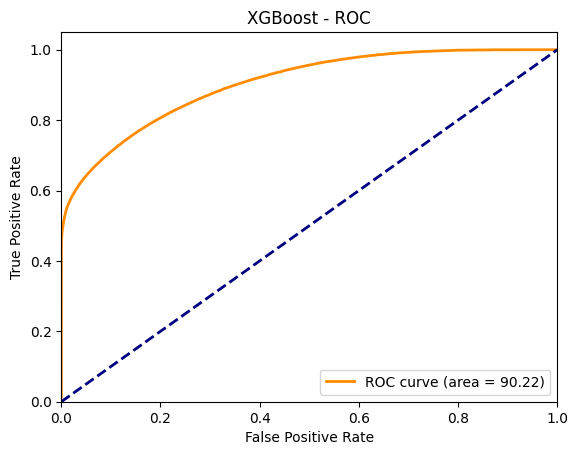

In [ ]:
plt.figure()
plt.plot(fp_roc, tp_roc, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % 90.22)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - ROC')
plt.legend(loc="lower right")

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_model_python_1687968248584_3867

,0,1,Error,Rate
0,4183.0,2051.0,0.329,(2051.0/6234.0)
1,1040.0,5062.0,0.1704,(1040.0/6102.0)
Total,5223.0,7113.0,0.2506,(3091.0/12336.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

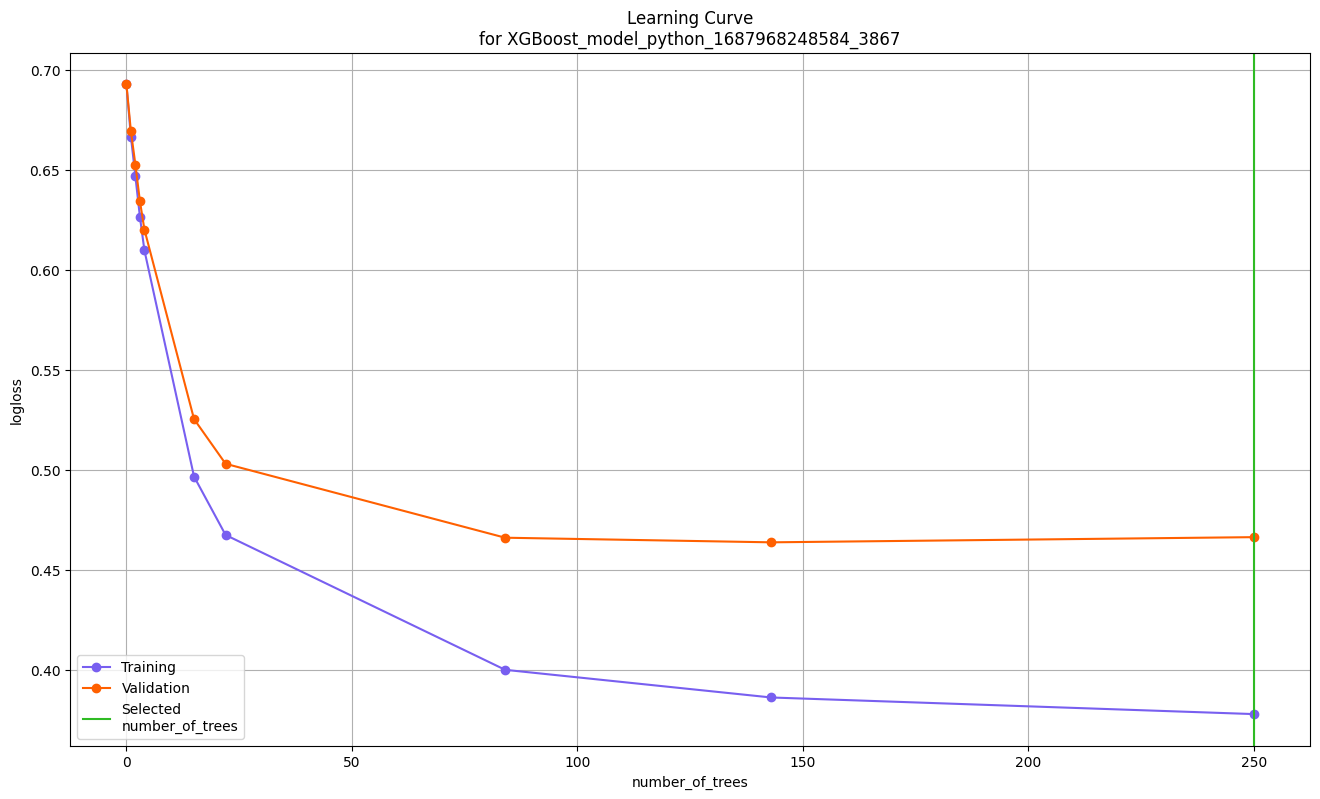

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

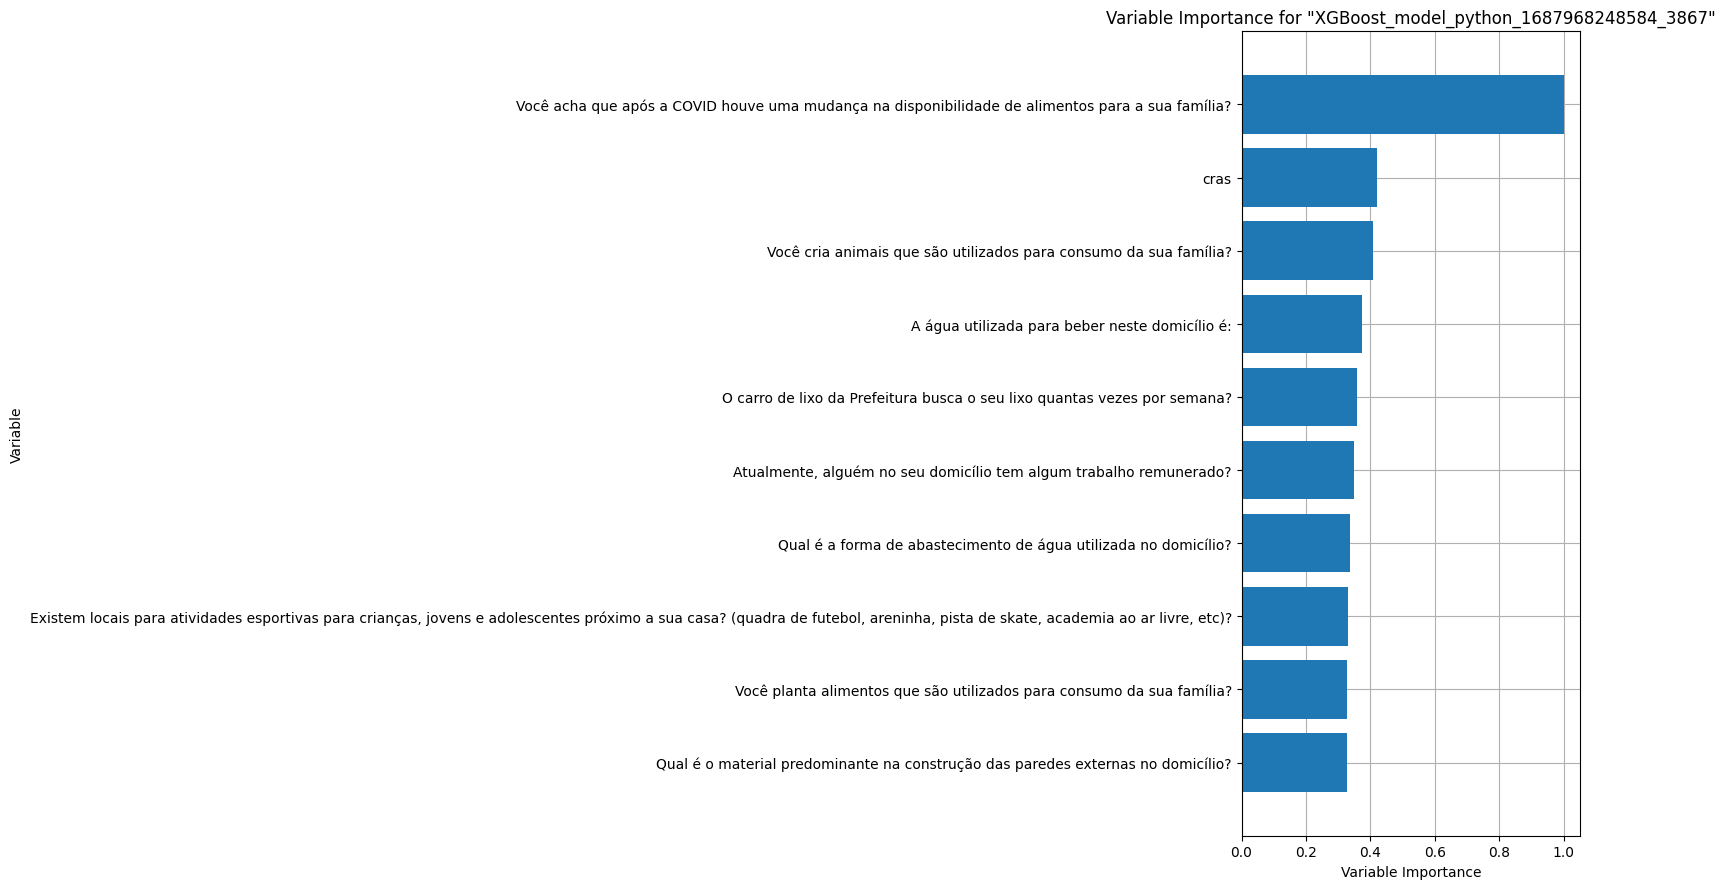

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

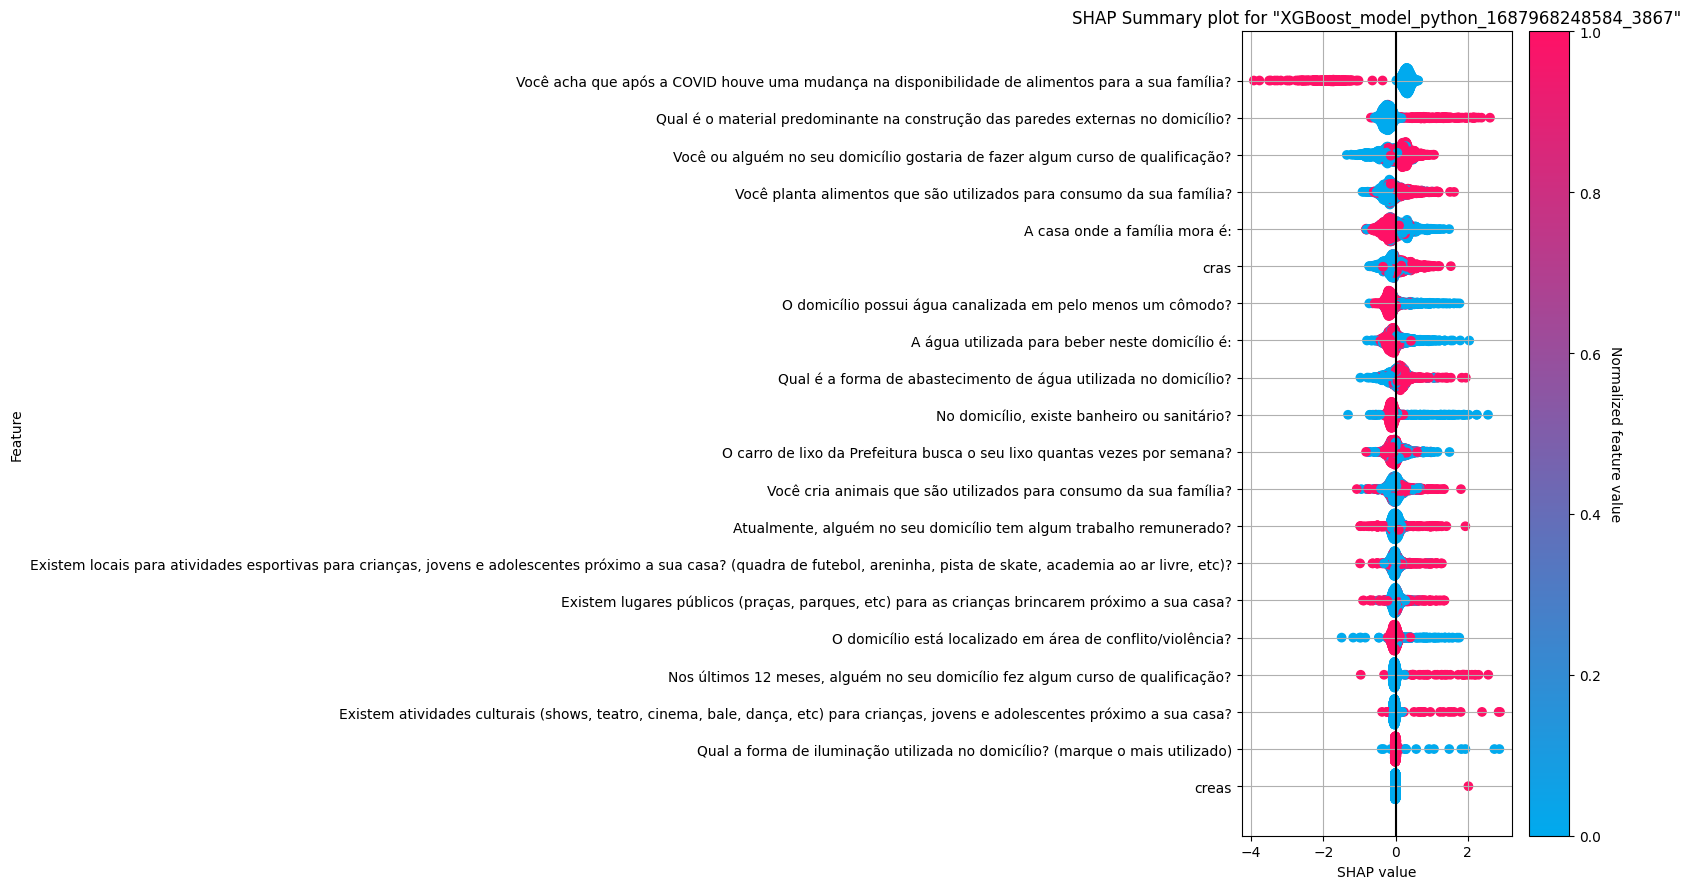

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

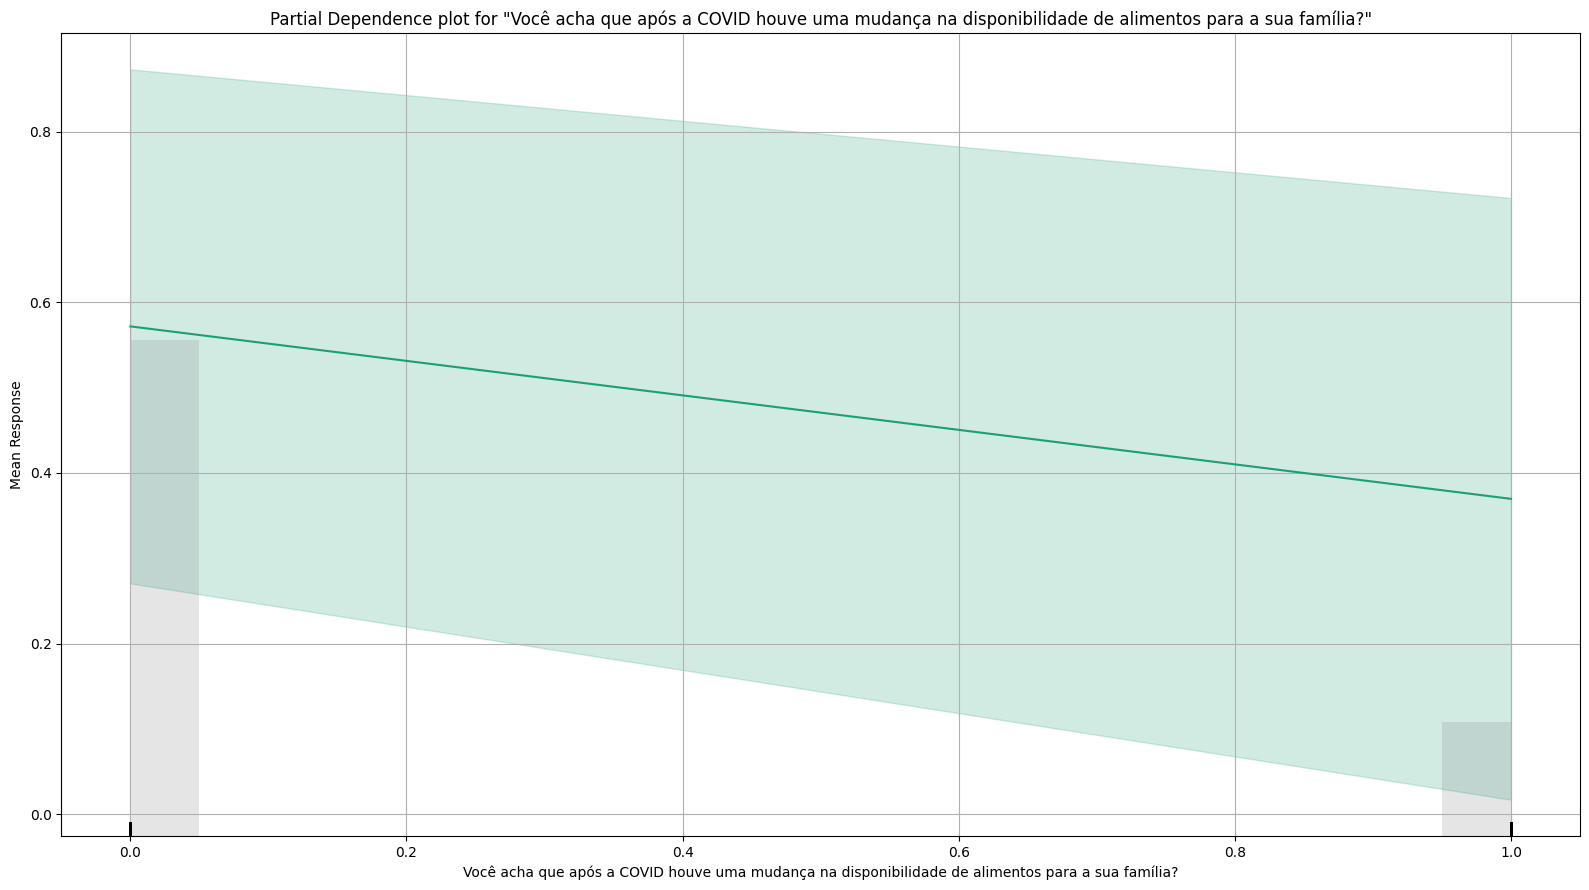

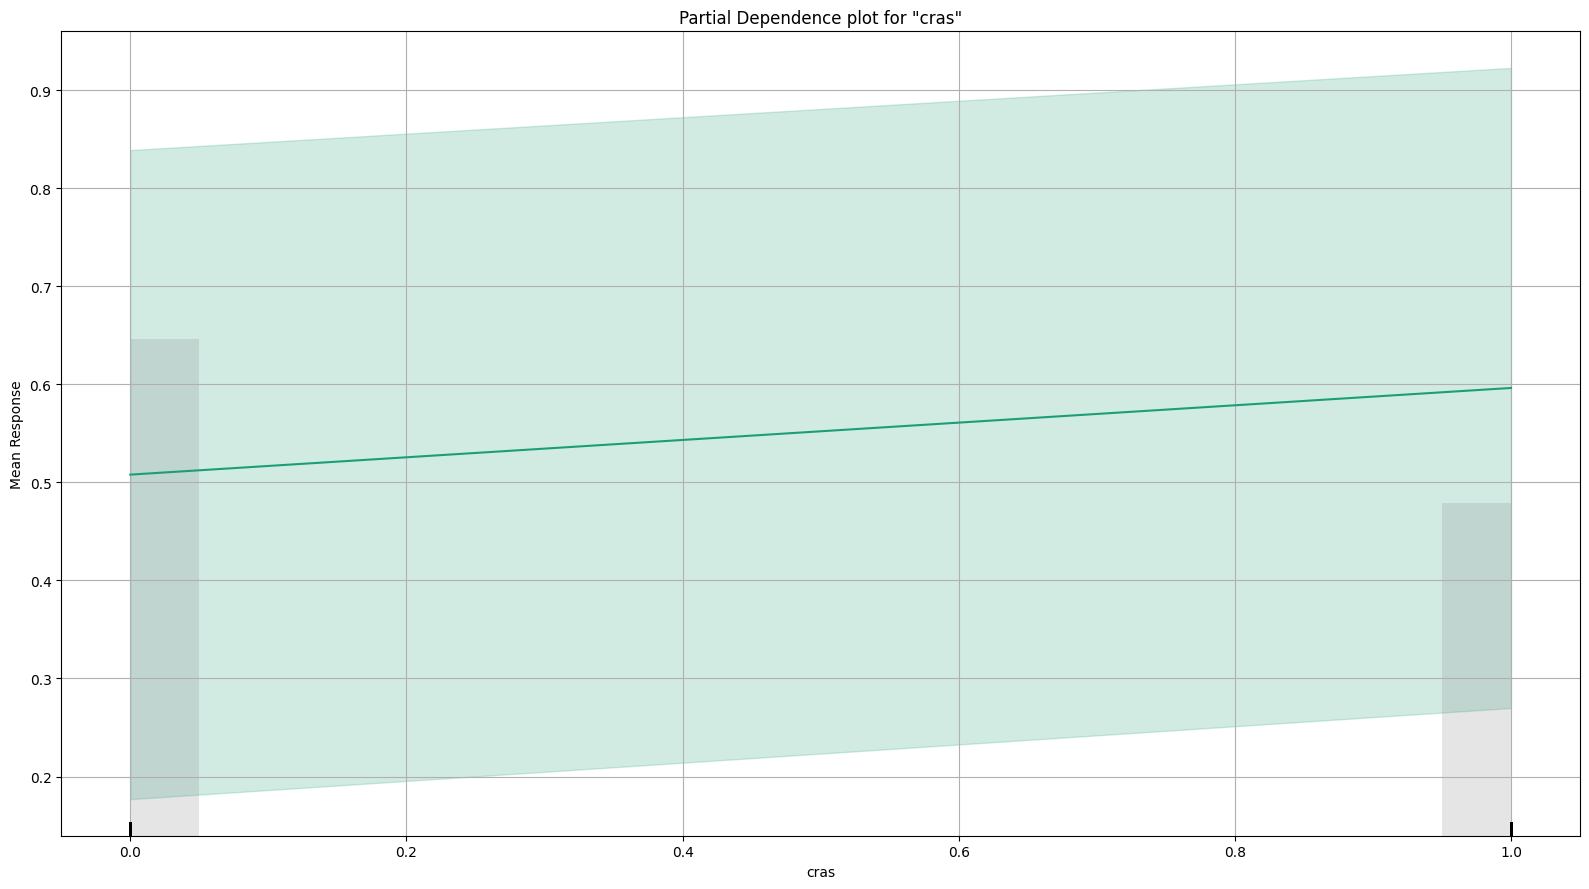

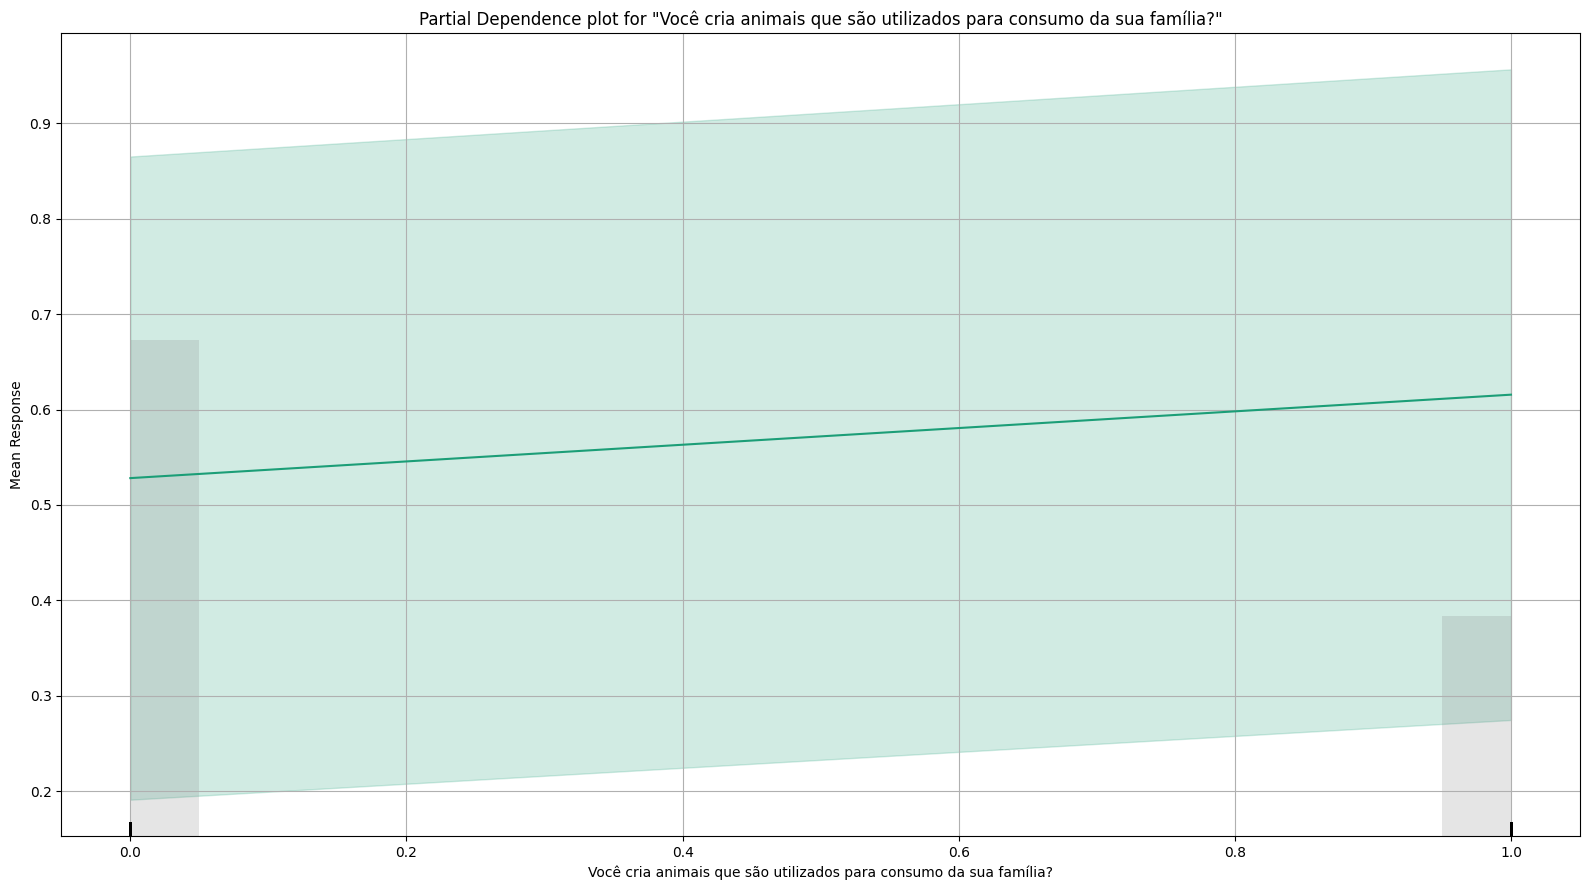

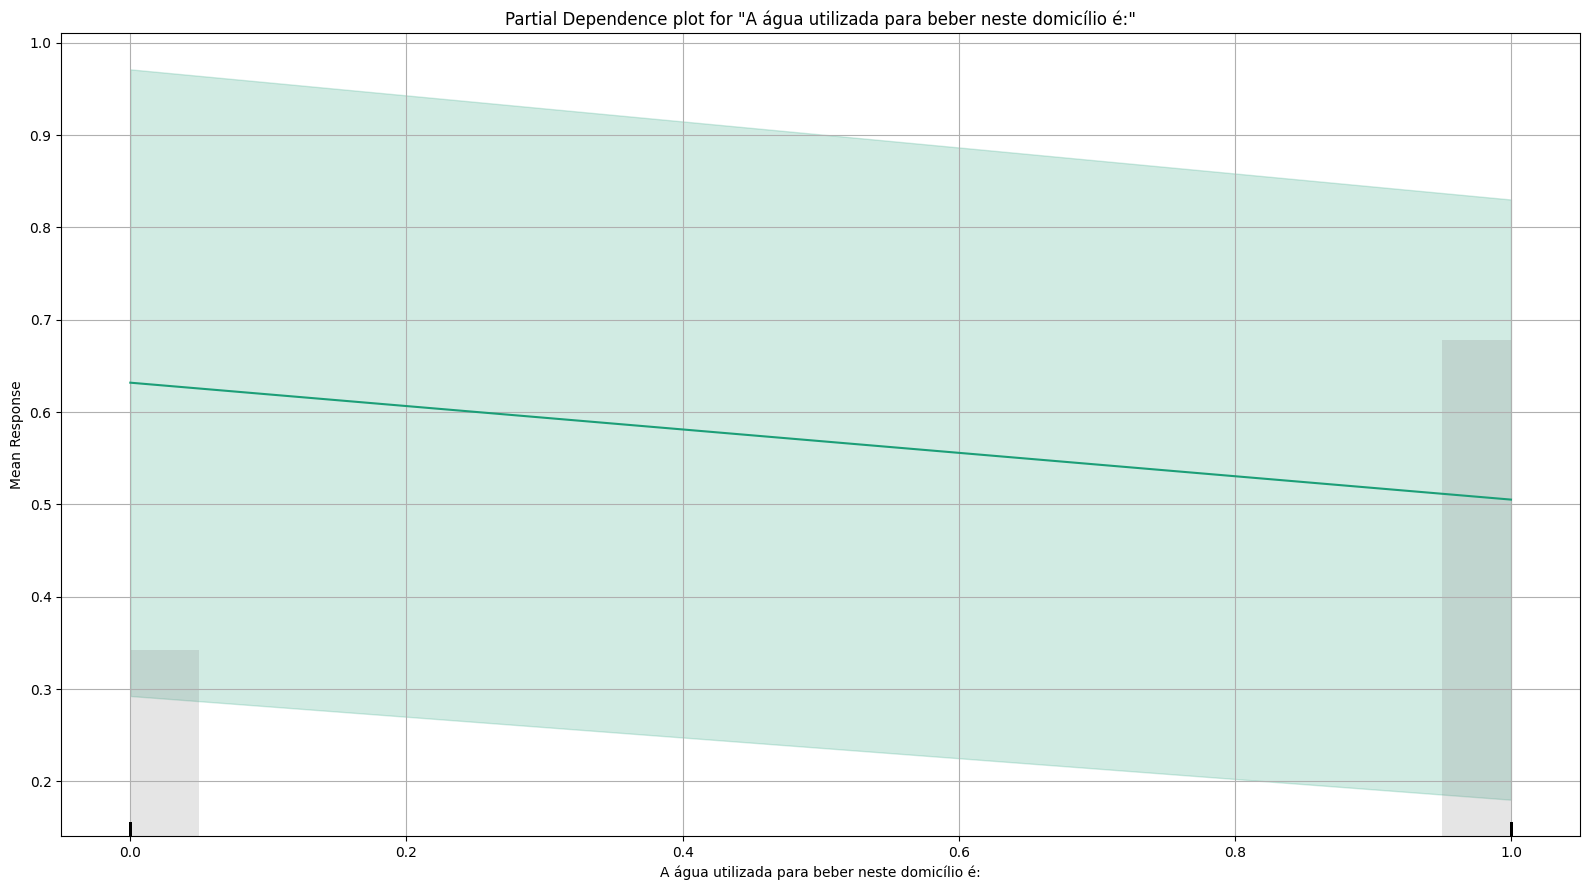

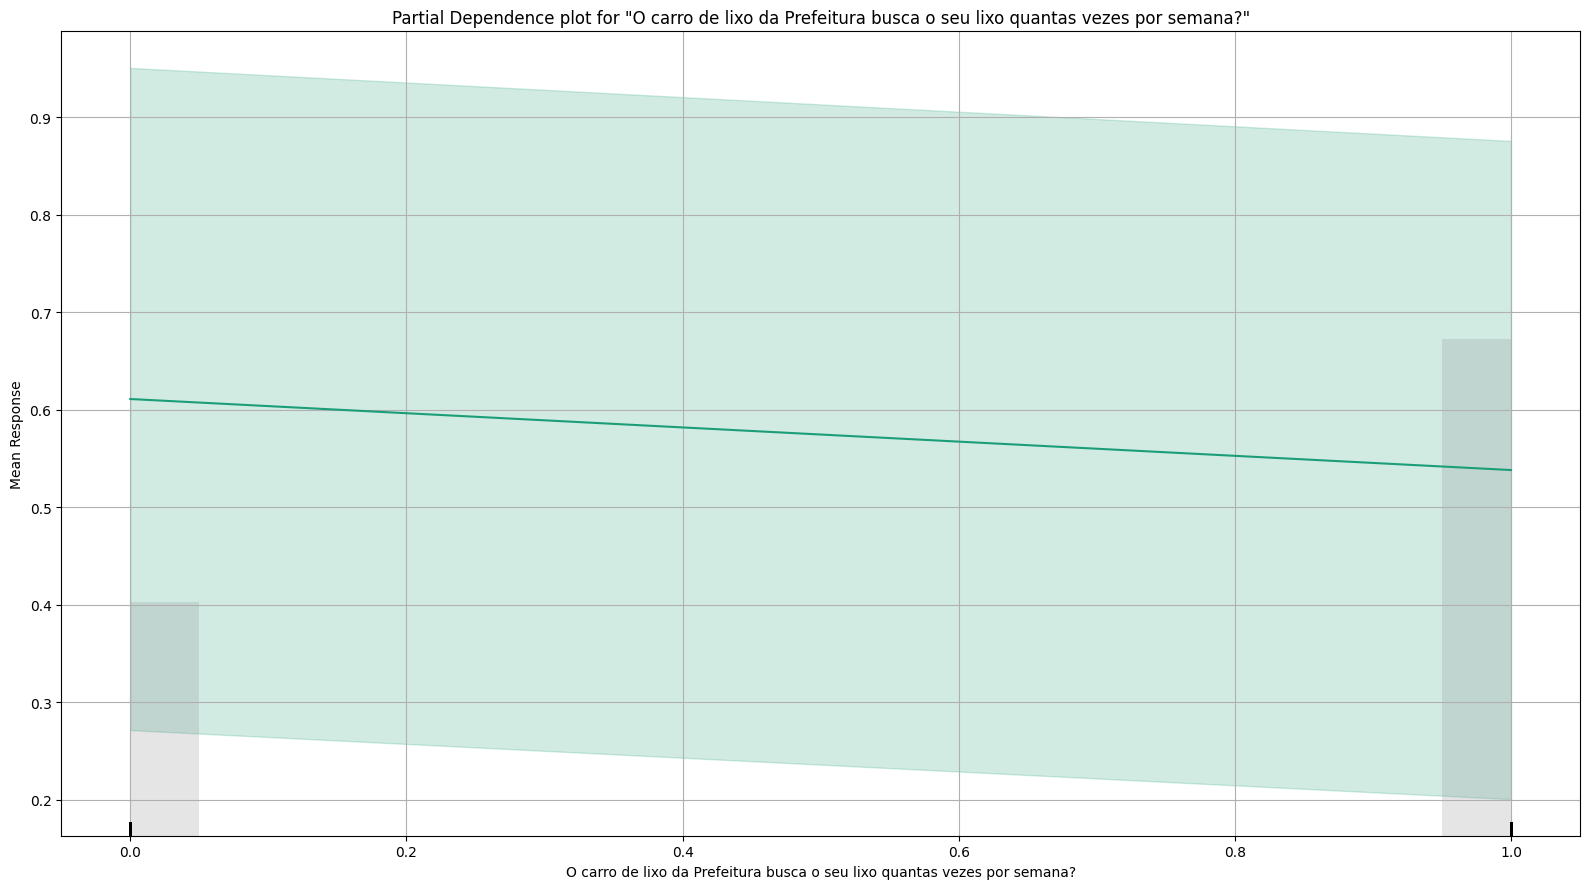

In [ ]:
exa = xgb.explain(test_bover)

# Stacked Ensemble

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.0 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.model_selection import learning_curve

In [ ]:
import shap

In [ ]:
binario_over  = pd.read_csv("/content/drive/MyDrive/trab final ML/dados/binario-over.csv")

In [ ]:
binario_over.shape

(61694, 21)

In [ ]:
binario_over.columns

Index(['Você acha que após a COVID houve uma mudança na disponibilidade de alimentos para a sua família?',
       'Você cria animais que são utilizados para consumo da sua família?',
       'Você planta alimentos que são utilizados para consumo da sua família?',
       'Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Nos últimos 12 meses, alguém no seu domicílio fez algum curso de qualificação?',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?

In [ ]:
X = binario_over.copy()

X.drop(['target_binario'], axis=1, inplace=True)

y = binario_over['target_binario']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model1 = GradientBoostingClassifier(n_estimators=100, learning_rate= 0.1, random_state=42, loss = 'log_loss')

In [ ]:
param_grid_gb = {
    'n_estimators': [80, 100],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 8] }

In [ ]:
grid_model1 = GridSearchCV(model1, param_grid_gb, cv=5, scoring='accuracy')

grid_model1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 8], 'n_estimators': [80, 100]},
             scoring='accuracy')

In [ ]:
print("Melhores hiperparâmetros encontrados:", grid_model1.best_params_)
print("Melhor acurácia:", grid_model1.best_score_)

Melhores hiperparâmetros encontrados: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}
Melhor acurácia: 0.7393779758889677


In [ ]:
model2 = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
param_grid_rf = {
    'n_estimators': [80, 100, 120],
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 4],
}

In [ ]:
grid_model2 = GridSearchCV(model2, param_grid_rf, cv=5, scoring='accuracy')

grid_model2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [80, 100, 120]},
             scoring='accuracy')

In [ ]:
print("Melhores hiperparâmetros encontrados:", grid_model2.best_params_)
print("Melhor acurácia:", grid_model2.best_score_)

Melhores hiperparâmetros encontrados: {'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 100}
Melhor acurácia: 0.6858879546145275


In [ ]:
best_model1 = grid_model1.best_estimator_
best_model2 = grid_model2.best_estimator_

In [ ]:
meta_classifier = RandomForestClassifier(random_state=42)

In [ ]:
estimators = [('gb', best_model1), ('rf', best_model2)]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_classifier)

In [ ]:
stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('gb',
                                GradientBoostingClassifier(max_depth=8,
                                                           random_state=42)),
                               ('rf',
                                RandomForestClassifier(max_depth=8,
                                                       min_samples_split=4,
                                                       random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=42))

In [ ]:
y_pred = stacking_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
aucpr = auc(recall, precision)

In [ ]:
print("Acc:", accuracy)
print("F1:", f1)
print("ROC AUC:", roc_auc)
print("AUCPR:", aucpr)

Acc: 0.7171569819272227
F1: 0.7219123505976095
ROC AUC: 0.7176865679879024
AUCPR: 0.7847593766163695


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

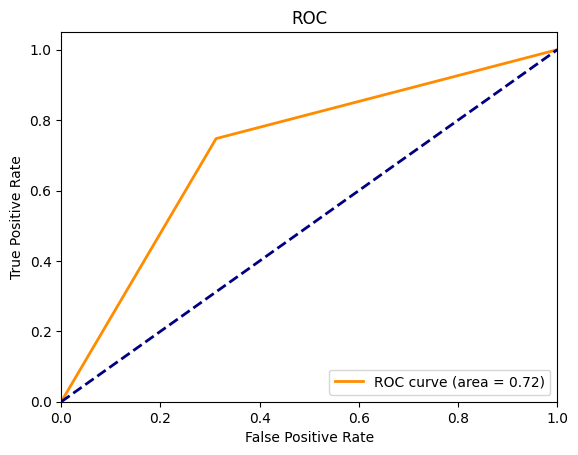

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(stacking_model, X_train, y_train, cv=5, scoring='accuracy')

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

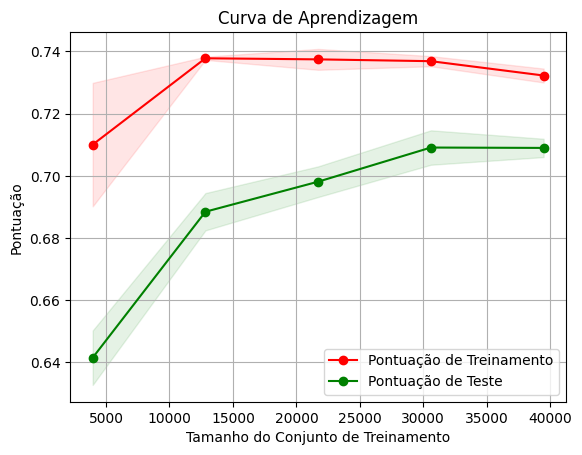

In [ ]:
plt.figure()
plt.title('Curva de Aprendizagem')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Pontuação')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='r')

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='g')

plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Pontuação de Treinamento')

plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Pontuação de Teste')

plt.legend(loc='best')
plt.show()

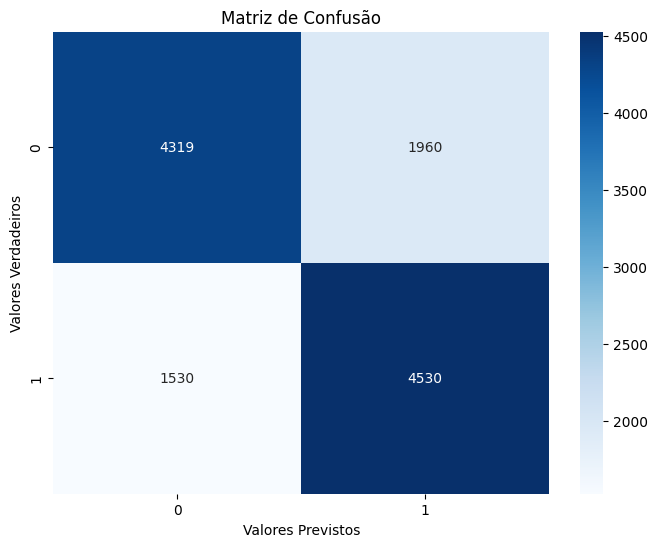

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Verdadeiros')
plt.show()

In [ ]:
base_model = stacking_model.final_estimator_

In [ ]:
explainer = shap.Explainer(base_model, X_train)

In [ ]:
shap_values = explainer.shap_values(X_test)

 99%|===================| 24509/24678 [02:04<00:00]       

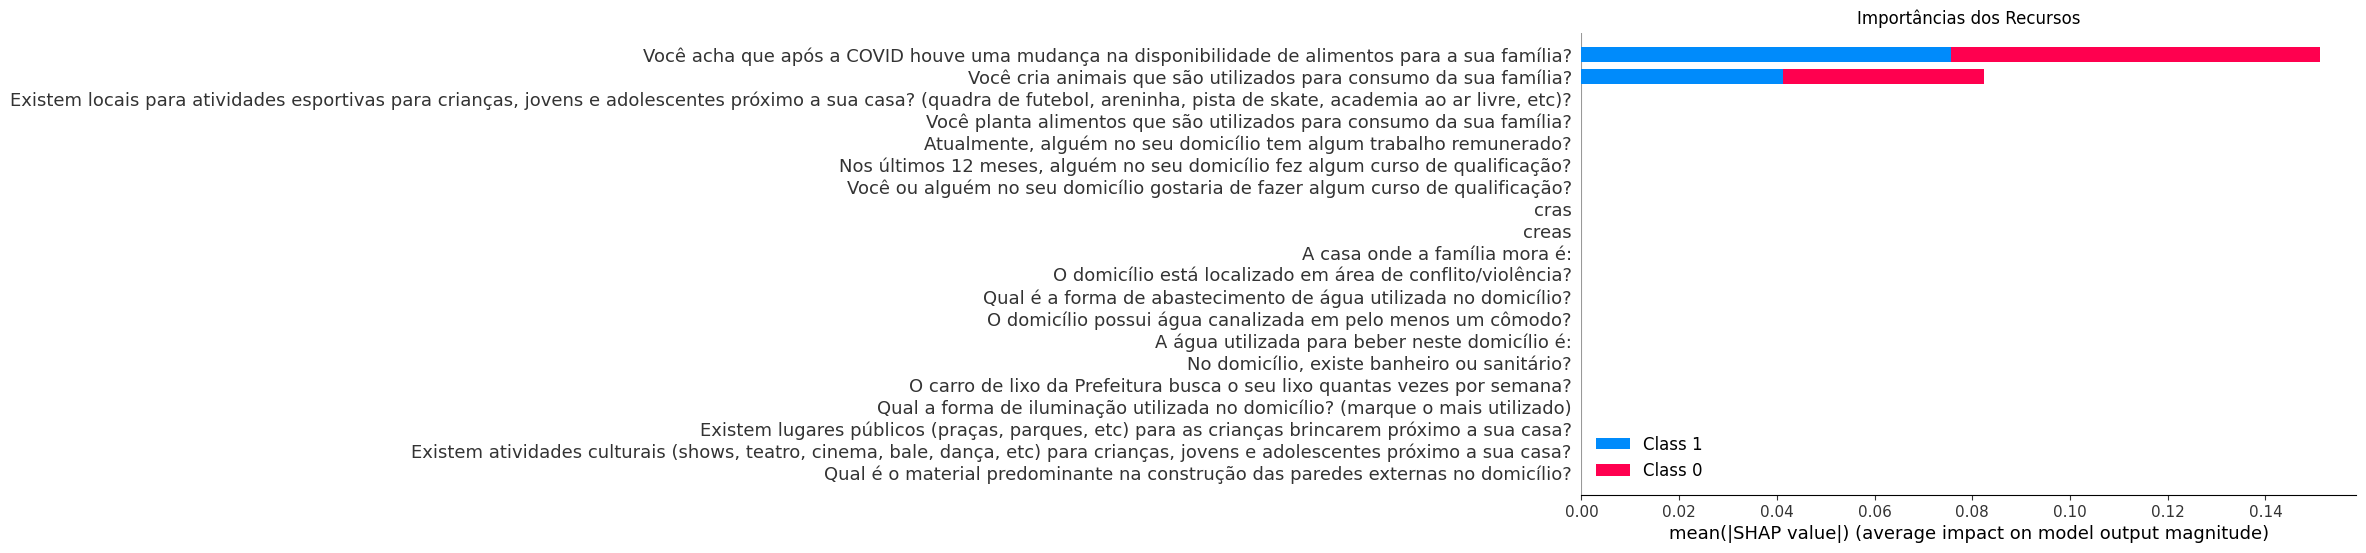

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=(10, 6), show=False)
plt.title('Importâncias dos Recursos')
plt.show()

# DRF - Distributed Random Forest

In [ ]:
bin_over  = h2o.import_file('C:/Users/guilherme_sales/Downloads/data_trab-ml/bin_over.csv')
bin_over["target_binario"] = bin_over["target_binario"].asfactor()
bin_over = bin_over.drop([0, 1])
x_bover = bin_over.columns
y_bover = 'target_binario'
x_bover.remove(y_bover)
train_bover, test_bover = bin_over.split_frame(ratios = [.8], seed = 42)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
params = {
    'max_depth': [0, 3, 8, 13, 18],
    'min_split_improvement': [0.0000000001, 0.000001, 0.0001],
    'ntrees': [15, 25, 50, 75],
    'col_sample_rate_change_per_level': [0.5, 1.0, 1.5, 2.0]
}

In [ ]:
DRF_grid1 = H2OGridSearch(model=H2ORandomForestEstimator,
                          grid_id='DRF_grid1',
                          hyper_params=params)

In [ ]:
DRF_grid1.train(x=predictors,
                y=response,
                training_frame=train,
                validation_frame=valid,
                binomial_double_trees=True
                )

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate_change_per_level,max_depth,min_split_improvement,ntrees,model_ids,logloss
,1.0,18.0,1e-10,75.0,DRF_grid1_model_198,0.4760159
,1.0,18.0,1e-06,75.0,DRF_grid1_model_218,0.4797982
,1.0,18.0,1e-10,50.0,DRF_grid1_model_138,0.4800069
,1.0,18.0,0.0001,75.0,DRF_grid1_model_238,0.4906353
,2.0,13.0,1e-10,50.0,DRF_grid1_model_136,0.4920527
,1.5,13.0,1e-06,75.0,DRF_grid1_model_215,0.4922476
,1.5,13.0,0.0001,75.0,DRF_grid1_model_235,0.4923314
,2.0,13.0,0.0001,75.0,DRF_grid1_model_236,0.4926408
,2.0,13.0,1e-06,50.0,DRF_grid1_model_156,0.4929672
,2.0,13.0,0.0001,50.0,DRF_grid1_model_176,0.4930483


In [ ]:
DRF_grid1.show()

,col_sample_rate_change_per_level,max_depth,min_split_improvement,ntrees,model_ids,logloss
,1.0,18.0,1e-10,75.0,DRF_grid1_model_198,0.4760159
,1.0,18.0,1e-06,75.0,DRF_grid1_model_218,0.4797982
,1.0,18.0,1e-10,50.0,DRF_grid1_model_138,0.4800069
,1.0,18.0,0.0001,75.0,DRF_grid1_model_238,0.4906353
,2.0,13.0,1e-10,50.0,DRF_grid1_model_136,0.4920527
,1.5,13.0,1e-06,75.0,DRF_grid1_model_215,0.4922476
,1.5,13.0,0.0001,75.0,DRF_grid1_model_235,0.4923314
,2.0,13.0,0.0001,75.0,DRF_grid1_model_236,0.4926408
,2.0,13.0,1e-06,50.0,DRF_grid1_model_156,0.4929672
,2.0,13.0,0.0001,50.0,DRF_grid1_model_176,0.4930483


In [ ]:
drf.train(x = x_bover, y = y_bover, training_frame = train_bover, validation_frame=train_bover)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1687837722199_63


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    75                 75                          3.18844e+06            18           18           18            3082          3552          3378.05

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.1460879173156503
RMSE: 0.3822144912423524
LogLoss: 0.49397867966076464
Mean Per-Class Error: 0.23588064752988502
AUC: 0.8685854308354243
AUCPR: 0.8839723884055372
Gini: 0.7371708616708486

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38779655338530394
       0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      17190  7509   0.304    (7509.0/24699.0)
1      4138   20531  0.1677   (4138.0/24669.0)
Total  21328  28040  0.2359   (11647.0/49368.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.387797     0.779032  231
max f2                       0.160552     0.86148   329
max f0point5                 0.654383     0.819299  122
max accuracy                 0.476901     0.779837  192
max precision                0.99355      0.991776  3
max recall                   2.77481e-05  1         399
max specificity              0.999996     0.998583  0
max absolute_mcc             0.577326     0.564571  150
max min_per_class_accuracy   0.444078     0.775832  206
max mean_per_class_accuracy  0.476901     0.779816  192
max tns                      0.999996     24664     0
max fns                      0.999996     20635     0
max fps                      2.77481e-05  24699     399
max tps                      2.77481e-05  24669     399
max tnr                      0.999996     0.998583  0
max fnr                      0.999996     0.836475  0
max fpr                      2.77481e-05  1         399
max tpr                      2.77481e-05  1         399

Gains/Lift Table: Avg response rate: 49,97 %, avg score: 48,62 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.082118                    1                  1.98394   1.98394            0.991367         1          0.991367                    1                   0.162917        0.162917                   98.3939   98.3939            0.1615
2        0.100126                    0.987179           1.97195   1.98178            0.985377         0.992763   0.990289                    0.998698            0.0355102       0.198427                   97.1952   98.1783            0.196484
3        0.150016                    0.951022           1.96709   1.9769             0.982948         0.970258   0.987848                    0.98924             0.0981394       0.296567                   96.7091   97.6897            0.292923
4        0.200008                    0.877451           1.90959   1.96007            0.954214         0.919837   0.979441                    0.971893            0.0954639       0.39203                    90.9588   96.0073            0.383812
5        0.300012                    0.672228           1.63032   1.85016            0.814665         0.776967   0.924516          

In [ ]:
drf = H2ORandomForestEstimator(max_depth= 18,
    min_split_improvement= 0.0000000001,
    ntrees=75,
    col_sample_rate_change_per_level= 1.0)

In [ ]:
drf.train(x = x_bover, y = y_bover, training_frame = train_bover, validation_frame=train_bover)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1687954041656_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    75                 75                          3.18238e+06            18           18           18            3030          3586          3371.29

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.14609701200011244
RMSE: 0.38222638841413403
LogLoss: 0.49131105491547983
Mean Per-Class Error: 0.22498911705397046
AUC: 0.8684767404692553
AUCPR: 0.8842354437540401
Gini: 0.7369534809385105

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42841800715688116
       0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      18535  6164   0.2496   (6164.0/24699.0)
1      4944   19725  0.2004   (4944.0/24669.0)
Total  23479  25889  0.225    (11108.0/49368.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.428418     0.780292  219
max f2                       0.155003     0.861911  332
max f0point5                 0.655598     0.819138  125
max accuracy                 0.479606     0.77931   197
max precision                0.997477     0.993136  1
max recall                   1.80674e-05  1         399
max specificity              0.999993     0.998826  0
max absolute_mcc             0.579789     0.565554  154
max min_per_class_accuracy   0.447561     0.774575  210
max mean_per_class_accuracy  0.479606     0.779288  197
max tns                      0.999993     24670     0
max fns                      0.999993     20648     0
max fps                      1.80674e-05  24699     399
max tps                      1.80674e-05  24669     399
max tnr                      0.999993     0.998826  0
max fnr                      0.999993     0.837002  0
max fpr                      1.80674e-05  1         399
max tpr                      1.80674e-05  1         399

Gains/Lift Table: Avg response rate: 49,97 %, avg score: 48,65 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0814495                   1                  1.98678   1.98678            0.992788         1          0.992788                    1                   0.161823        0.161823                   98.6783   98.6783            0.160648
2        0.100004                    0.988504           1.98592   1.98662            0.992358         0.993607   0.992708                    0.998814            0.0368479       0.19867                    98.5923   98.6623            0.197213
3        0.150016                    0.951719           1.95664   1.97663            0.977724         0.971202   0.987713                    0.989609            0.0978556       0.296526                   95.6637   97.6626            0.292842
4        0.200008                    0.875983           1.91121   1.96028            0.955024         0.918741   0.979542                    0.971895            0.095545        0.392071                   91.121    96.0276            0.383893
5        0.300012                    0.673069           1.64086   1.8538             0.819931         0.777776   0.926339       

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_model_python_1687954041656_1

,0,1,Error,Rate
0,3802.0,2355.0,0.3825,(2355.0/6157.0)
1,772.0,5397.0,0.1251,(772.0/6169.0)
Total,4574.0,7752.0,0.2537,(3127.0/12326.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

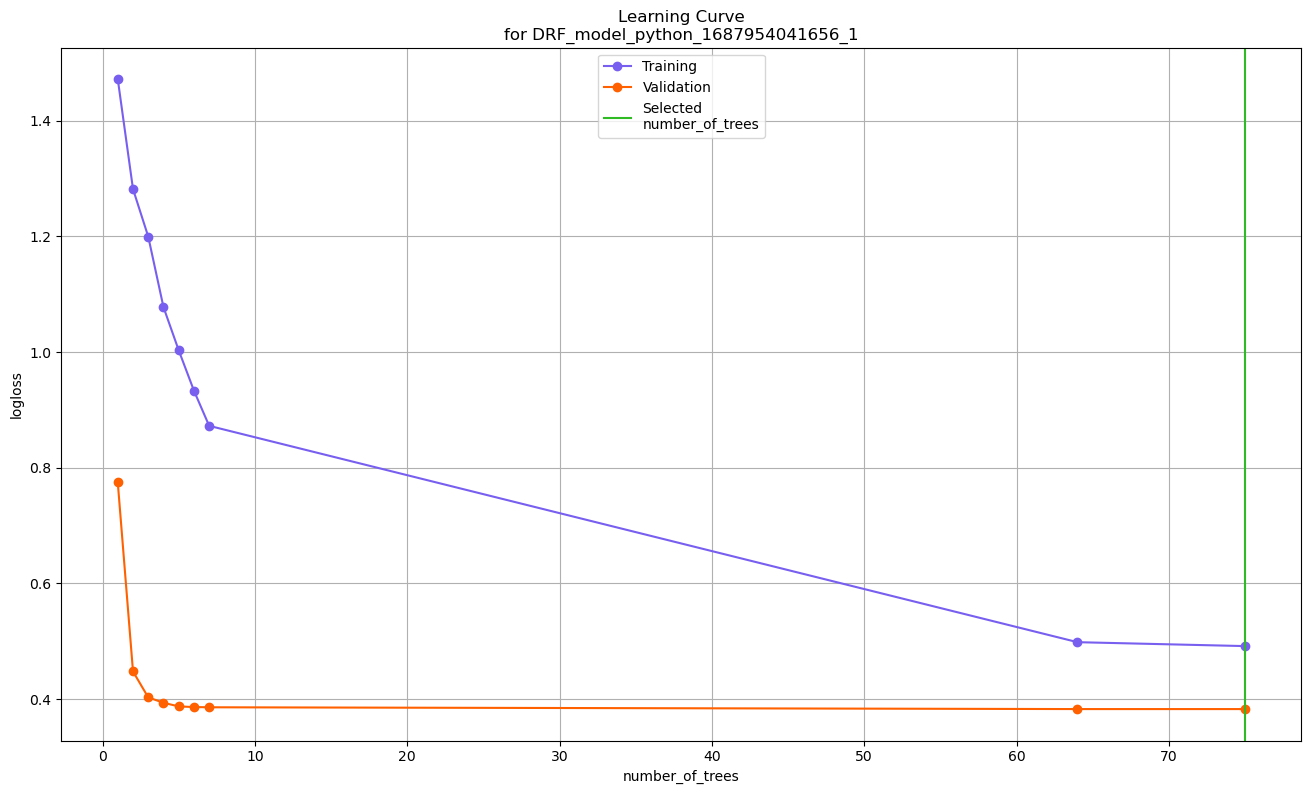

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

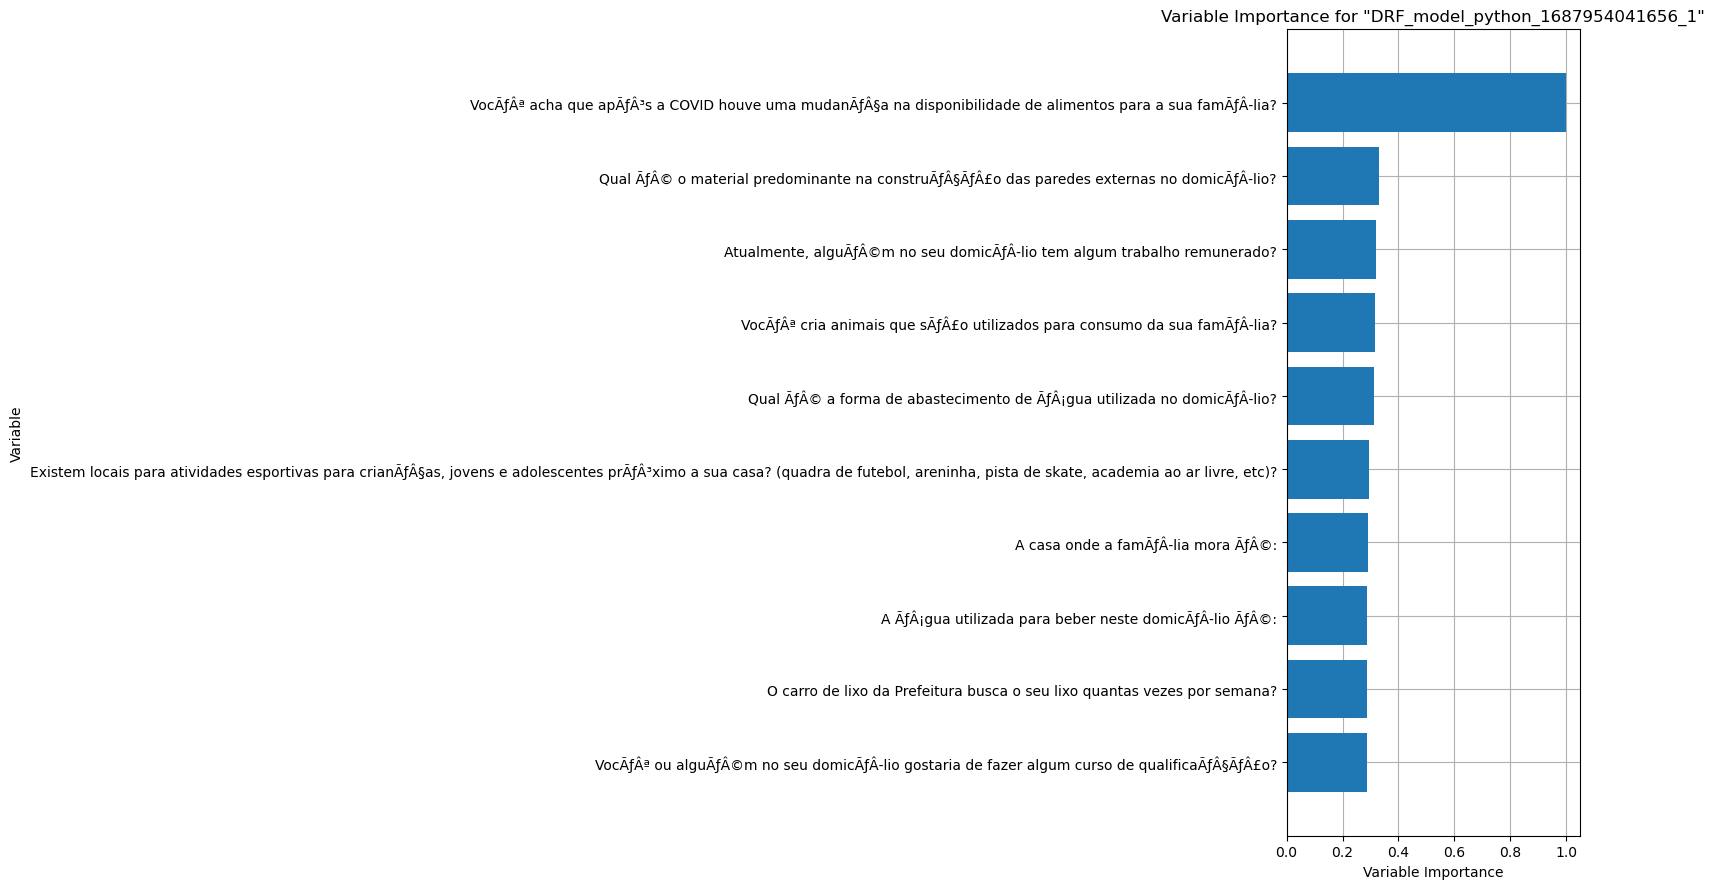

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

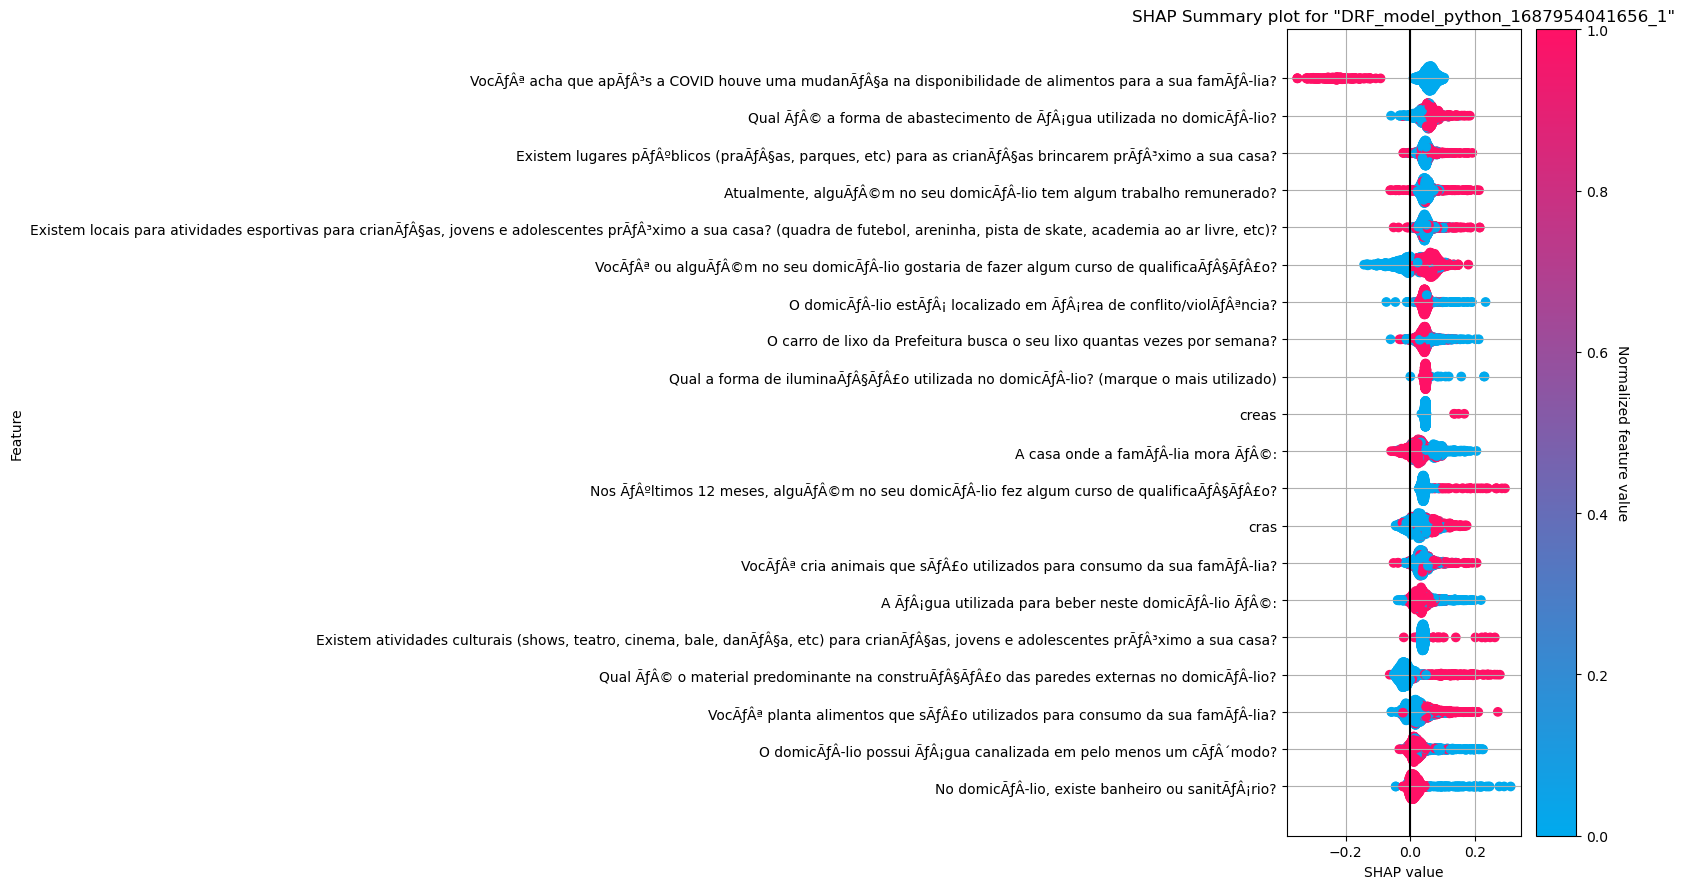

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

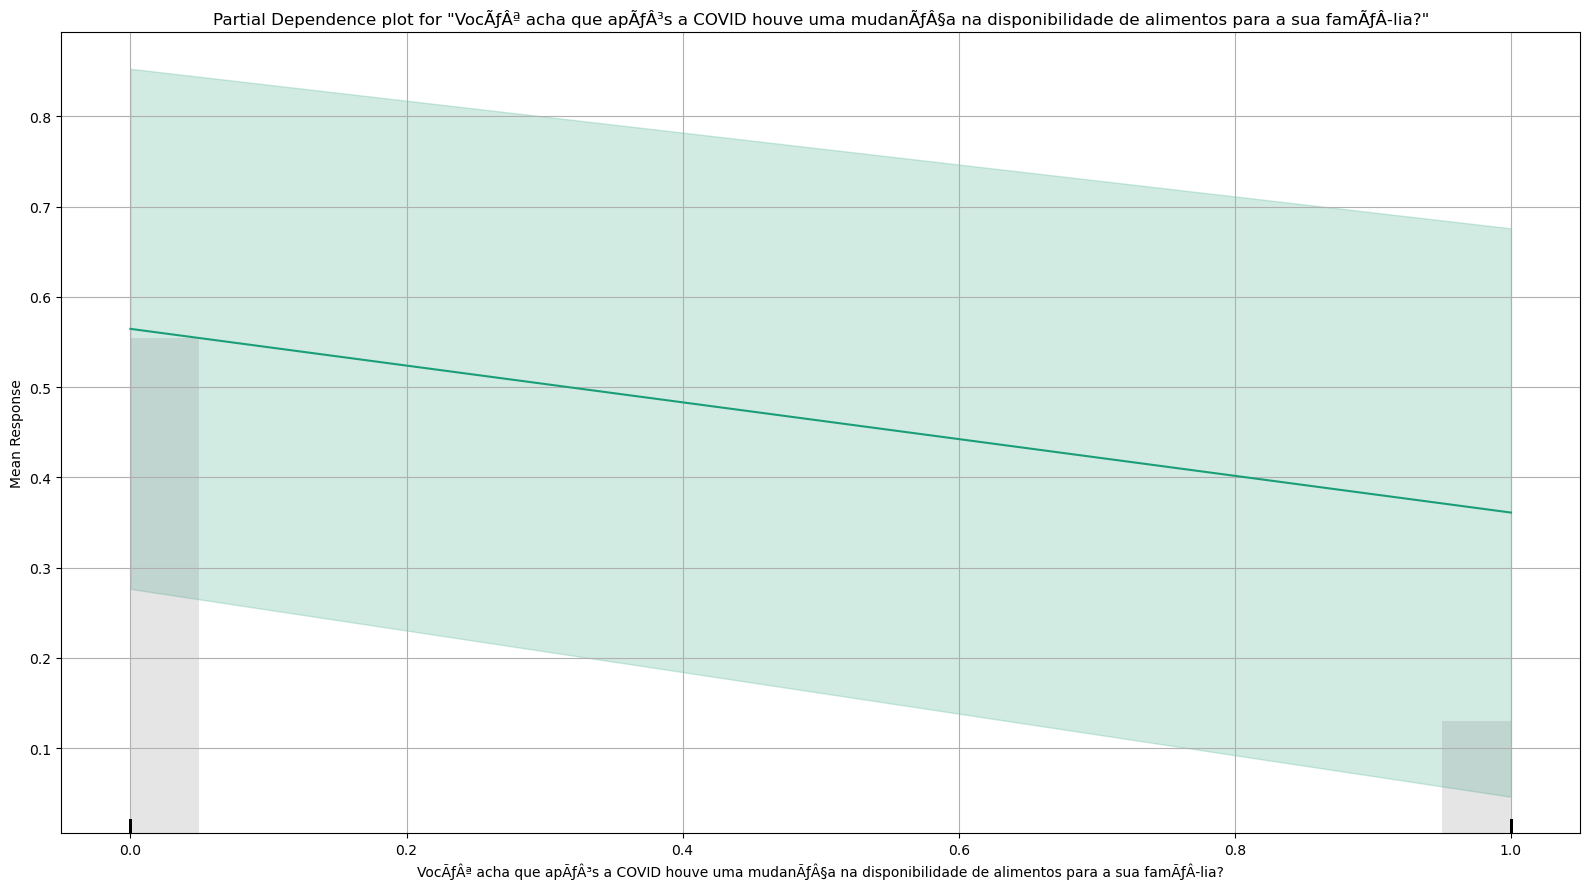

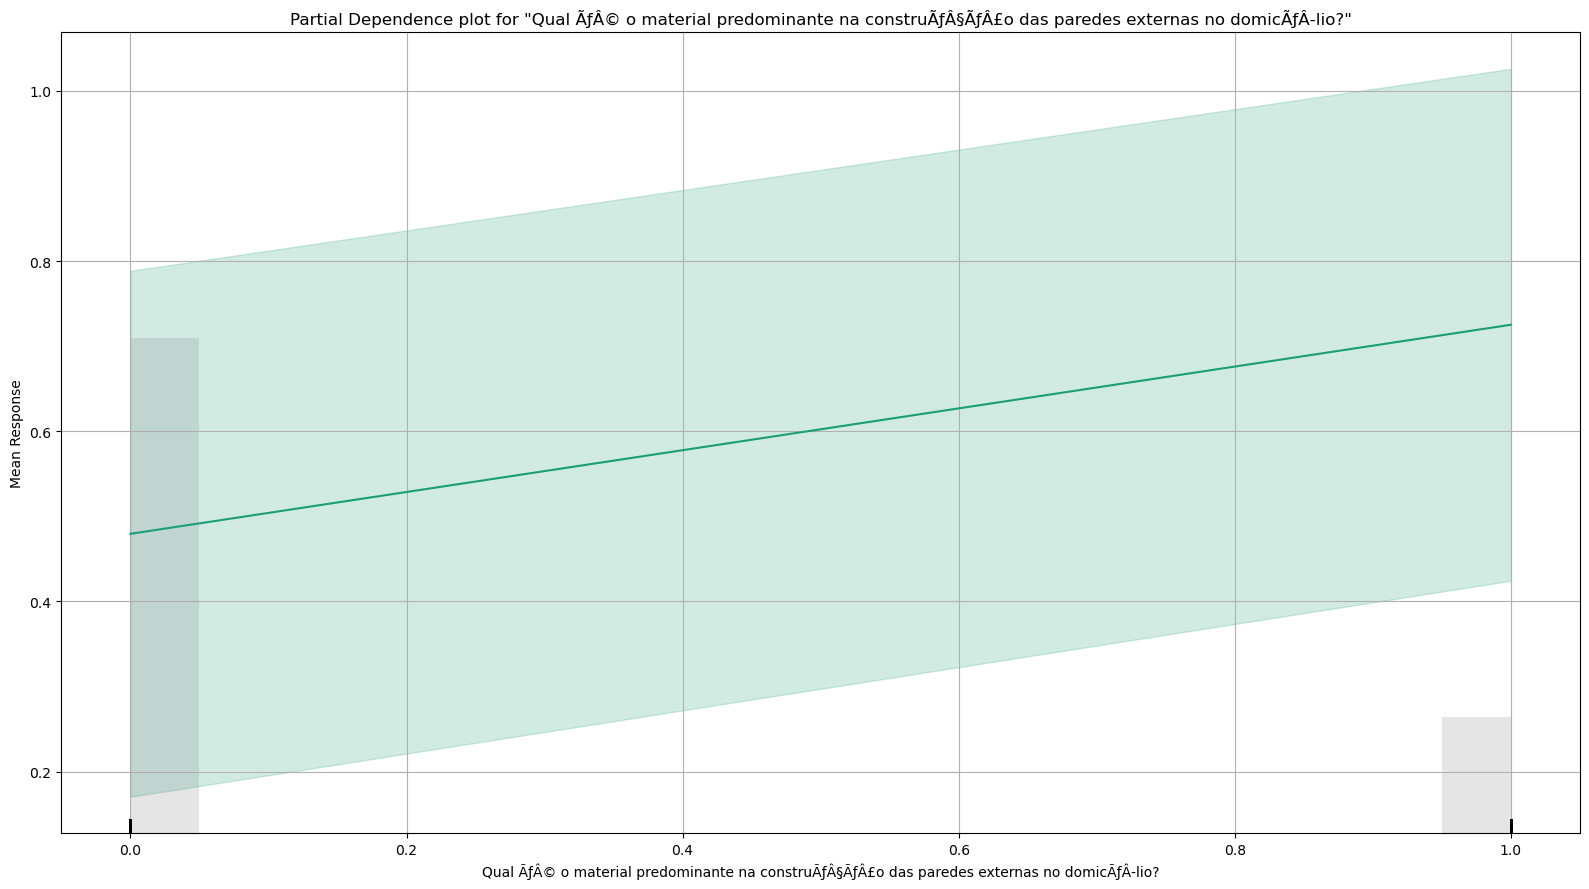

H2OServerError: HTTP 500 Server Error:
Server error java.lang.NullPointerException:
  Error: Caught exception: java.lang.NullPointerException
  Request: None
  Stacktrace: java.lang.NullPointerException
      hex.PartialDependence.checkSanityAndFillParams(PartialDependence.java:181)
      hex.PartialDependence.execImpl(PartialDependence.java:58)
      water.api.ModelsHandler.makePartialDependence(ModelsHandler.java:174)
      java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
      java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
      java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
      java.base/java.lang.reflect.Method.invoke(Method.java:566)
      water.api.Handler.handle(Handler.java:60)
      water.api.RequestServer.serve(RequestServer.java:472)


<Figure size 1600x900 with 0 Axes>

In [ ]:
exa = drf.explain(test_bover)